Houze Xu

1005133115

## Q1

1.1.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from itertools import product
warnings.filterwarnings('ignore')

In [2]:
# import the dataset as 'txn'
txn = pd.read_csv('Retail_Data_Transactions.csv')
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
# Identify the number of rows
print('The number of rows is:', len(txn))

The number of rows is: 125000


1.1.2

In [4]:
# create new column 'txn_date' 
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
# drop the column 'trans_date'
txn.drop(['trans_date'], axis=1, inplace = True)
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


1.1.3

In [5]:
# identify the min() and max() of column 'txn_date'
print("min() of column 'txn_date':", txn.txn_date.min())
print("max() of column 'txn_date':", txn.txn_date.max())

min() of column 'txn_date': 2011-05-16 00:00:00
max() of column 'txn_date': 2015-03-16 00:00:00


1.1.4

In [6]:
# create the column 'ME_DT'with the last day of the month in the 'trans_date' column.
txn['ME_DT'] = txn['txn_date'] + pd.offsets.MonthEnd(0)
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


1.1.5

In [7]:
# create the 
txn['YEAR'] = pd.DatetimeIndex(txn['txn_date']).year
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013


## 1.2

1.2.1

In [8]:
agg_sum = pd.NamedAgg(column="tran_amount", aggfunc="sum")
agg_mean = pd.NamedAgg(column="tran_amount", aggfunc=np.mean)
agg_std = pd.NamedAgg(column = "tran_amount", aggfunc="std")
agg_var = pd.NamedAgg(column = "tran_amount", aggfunc = "var")
agg_sem = pd.NamedAgg(column = "tran_amount", aggfunc = "sem")
agg_max = pd.NamedAgg(column = "tran_amount", aggfunc = "max")
agg_min = pd.NamedAgg(column = "tran_amount", aggfunc = "min")
agg_count = pd.NamedAgg(column = "tran_amount", aggfunc = "count")
clnt_annual_aggregations = txn.groupby(["customer_id", "YEAR"]).agg(ann_txn_amt_sum=agg_sum, ann_txn_amt_ave=agg_mean,
                                                                   ann_txn_amt_std=agg_std, ann_txn_amt_var=agg_var, 
                                                                    ann_txn_amt_sem=agg_sem, ann_txn_amt_max=agg_max,
                                                                    ann_txn_min=agg_min, ann_txn_amt_cnt=agg_count)
clnt_annual_aggregations.head()

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   

                  ann_txn_min  ann_txn_amt_cnt  
customer_id YEAR                                
CS1112      2011           56                3  
            2012           52                5  
            2013           36                3  
            2014           59                3  
            2015           39                1

1.2.2

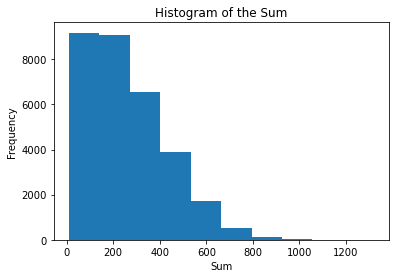

In [9]:
# plot the histogram of the sum
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
plt.title('Histogram of the Sum')
plt.xlabel('Sum')
plt.ylabel('Frequency')
plt.show()

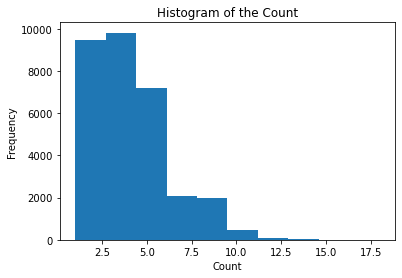

In [10]:
# plot the histogram of the count
plt.hist(clnt_annual_aggregations['ann_txn_amt_cnt'])
plt.title('Histogram of the Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

1.2.3

In [11]:
# reset the index and reshape the table
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(columns = 'YEAR', index = 'customer_id')
clnt_annual_aggregations_pivot.fillna(0, inplace = True)
clnt_annual_aggregations_pivot.head()

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_var  \
YEAR                   2011 2012 2013 2014 2015  ...            2011   
customer_id                                      ...                   
CS1112                  3.0  5.0  3.0  3.0  1.0  ...      485.333333   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...      444.333333   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...       94.700000   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...      225.000000   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...      449.583333   

                                                             ann_txn_min  \
YEAR               2012         2013        2014        2015        2011   
customer_id                                                                
CS1112       161.800000  1190.333333  284.333333    0.000000        56.0   
CS1113       290.200000   171.200000  781.666667  745.333333        57.0   
CS1114       968.000000   619.300000  726.166667    0.000000        76.0   
CS1115       477.285714   110.952381  512.250000    0.000000        72.0   
CS1116       908.333333     0.000000  636.800000    0.000000        41.0   

                                     
YEAR         2012  2013  2014  2015  
customer_id                          
CS1112       52.0  36.0  59.0  39.0  
CS1113       51.0  65.0  36.0  44.0  
CS1114       53.0  43.0  37.0  79.0  
CS1115       41.0  66.0  50.0  55.0  
CS1116       45.0  59.0  40.0   0.0  

[5 rows x 40 columns]

We have 8 aggregated features with five years' data, thus we will have 8*5 = 40 columns.

I filled NaN values with 0s since there are no transactions during that period.

1.2.4

In [12]:
clnt_annual_aggregations_pivot.columns.nlevels

2

In [13]:
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt

1.2.5

In [14]:
# extracting level 0 and convert it to a string type and named it level_0
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values (0).astype (str)
# extracting level 1 and convert it to a string type and named it level_1
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values (1).astype (str)
# concatenates level_0 and level_1, then create a new column name
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

The first line transform the first conlumn level into a data string type.

The second line transform the second column level into a data srting type.

The third line concatenates the first column level and second column level into one column level.

In [15]:
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_min_2011,ann_txn_min_2012,ann_txn_min_2013,ann_txn_min_2014,ann_txn_min_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,485.333333,161.800000,1190.333333,284.333333,0.000000,56.0,52.0,36.0,59.0,39.0
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,444.333333,290.200000,171.200000,781.666667,745.333333,57.0,51.0,65.0,36.0,44.0
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,94.700000,968.000000,619.300000,726.166667,0.000000,76.0,53.0,43.0,37.0,79.0
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,225.000000,477.285714,110.952381,512.250000,0.000000,72.0,41.0,66.0,50.0,55.0
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,449.583333,908.333333,0.000000,636.800000,0.000000,41.0,45.0,59.0,40.0,0.0


In [16]:
# save the output dataframe as an excel file named 'annual_features.xlsx'
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

1.2.6

The possible disadvantages in capturing client transaction behavior with the annual features described in this section would be yearly transaction behavior is too general, we could deep more into monthly, weekly or even daily transactions.

## 1.3

1.3.1

In [17]:
agg_sum = pd.NamedAgg(column="tran_amount", aggfunc="sum")
agg_count = pd.NamedAgg(column = "tran_amount", aggfunc = "count")
clnt_monthly_aggregations= txn.groupby(["customer_id", "ME_DT"]).agg(mth_txn_amt_sum=agg_sum, mth_txn_cnt=agg_count)
clnt_monthly_aggregations.loc['CS1112', :]

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


1.3.2

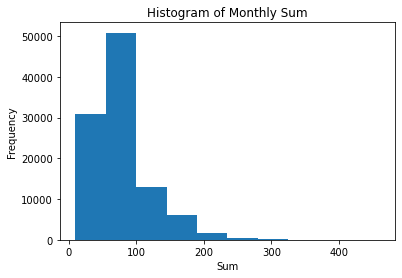

In [18]:
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
plt.title("Histogram of Monthly Sum")
plt.xlabel("Sum")
plt.ylabel("Frequency")
plt.show()

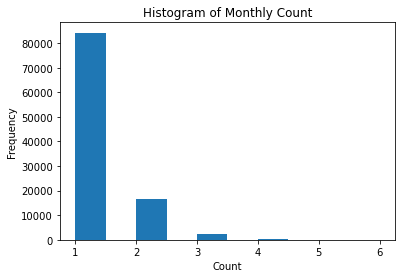

In [19]:
plt.hist(clnt_monthly_aggregations['mth_txn_cnt'])
plt.title("Histogram of Monthly Count")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

From my observation, I found both monthly sum and monthly count plots are right skewed. Most monthly sum are located in range 0-100 and most frequent count is located at 1.

In [20]:
print('The most common value for monthly sum is:', clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0])
print("The maximum value for monthly sum is:", clnt_monthly_aggregations['mth_txn_amt_sum'].max())
print('The most common value for monthly count is:', clnt_monthly_aggregations['mth_txn_cnt'].mode()[0])
print("The maximum value for monthly count is:", clnt_monthly_aggregations['mth_txn_cnt'].max())

The most common value for monthly sum is: 77
The maximum value for monthly sum is: 460
The most common value for monthly count is: 1
The maximum value for monthly count is: 6


Comparing with the ones in section 1.2, they are all right skewed. The distribution is more dense in section 1.2. Plots have smaller scales in this section.

## 1.4

1.4.1

In [22]:
clnt_no = txn['customer_id'].unique()
me_dt = txn['ME_DT'].unique()
print("The number of unique clients are:", len(clnt_no))
print("The number of month-end-dates are:", len(me_dt))

The number of unique clients are: 6889
The number of month-end-dates are: 47


Q1.4.2

In [23]:
# create an itertools.product object
base_table = product ( clnt_no , me_dt )

In [24]:
# check object
type(base_table)

itertools.product

1.4.3

In [25]:
# Convert the itertools.product object base_table into a pandas object called base_table_pd
base_table_pd = pd.DataFrame.from_records(product(clnt_no, me_dt), columns=['CLNT_NO','ME_DT'])

1.4.4

In [26]:
# filter client CS1112 
# confirm the dates fall between the min and max month-dates of txn_date
# check the min of txn_date is smaller than min month-date of client CS1112
# check the max of txn_date is bigger than max month-date of client CS1112
print('The min month-date of client CS1112 is:', base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].min())
print('The max month-date of client CS1112 is:', base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].max())
print('Confirming the dates fall between the min and max month-dates in section 1.1:', ((txn.txn_date.min()) < (base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].min())) & ((txn.ME_DT.max()) >= (base_table_pd[base_table_pd['CLNT_NO']=='CS1112']['ME_DT'].max())))
# confirm that the snapshot of client CS1112 has 47 rows
print('The number of rows of snapshot of client CS1112 is:', len(base_table_pd[base_table_pd['CLNT_NO']=='CS1112']))

The min month-date of client CS1112 is: 2011-05-31 00:00:00
The max month-date of client CS1112 is: 2015-03-31 00:00:00
Confirming the dates fall between the min and max month-dates in section 1.1: True
The number of rows of snapshot of client CS1112 is: 47


In [27]:
# confirm that the base table pd has 323,783 rows
print("The number of rows of base_table_pd is:", len(base_table_pd))

The number of rows of base_table_pd is: 323783


## 1.5

1.5.1

In [28]:
clnt_monthly_aggregations.index.set_names(['CLNT_NO','ME_DT'],inplace=True)
base_clnt_mth = pd.merge(base_table_pd, clnt_monthly_aggregations, on = ['CLNT_NO', 'ME_DT'], how = 'left')
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN


The reason that some rows have NaN values is because clnt_monthly_aggregations table does not match some transactions in base_clnt_mth table.

In [29]:
base_clnt_mth.fillna(0, inplace = True)
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0


I will choose to fill NaN values in the sum and count columns with 0s since there are not transactions with the client in that specific time period.

In [30]:
print("The number of rows that I expect is:", len(base_clnt_mth))

The number of rows that I expect is: 323783


In [31]:
print("The number of rows in table clnt_monthly_aggregations is:", len(clnt_monthly_aggregations))

The number of rows in table clnt_monthly_aggregations is: 103234


In [32]:
clnt_monthly_aggregations.head()

mth_txn_amt_sum  mth_txn_cnt
CLNT_NO ME_DT                                   
CS1112  2011-06-30               56            1
        2011-08-31               96            1
        2011-10-31               60            1
        2012-04-30               56            1
        2012-06-30               52            1

Table base_clnt_mth has 323783 rows. And table clnt_month_aggregations has 103234 rows. Table base_clnt_mth contains transactions and non-transactions which joins all clients and dates. However, table clnt_monthly_aggregations only contains transactions. Thus, clnt_monthly_aggregations contains less rows than table base_clnt_mth.

1.5.2

In [33]:
base_clnt_mth.sort_values(by=['CLNT_NO', 'ME_DT'], inplace = True)
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0


1.5.3

In [34]:
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(3).agg(['sum', 'mean', 'max'])
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(6).agg(['sum', 'mean', 'max'])
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum', 'mth_txn_cnt']].rolling(12).agg(['sum', 'mean', 'max'])

In [35]:
# the output of 3 months rolling
rolling_features_3M

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0
...                        ...        ...   ...         ...       ...  ...
CS9000  295140             0.0   0.000000   0.0         0.0  0.000000  0.0
        295126             0.0   0.000000   0.0         0.0  0.000000  0.0
        295119             0.0   0.000000   0.0         0.0  0.000000  0.0
        295136            34.0  11.333333  34.0         1.0  0.333333  1.0
        295114            34.0  11.333333  34.0         1.0  0.333333  1.0

[323783 rows x 6 columns]

2, 5, 11 rows appear with NaN values at the beginning of each client for 3, 6 and 12-month correspondingly since rolling function compute n rows which results previous n-1 rows do not have enough data to compute.

In [36]:
print("The levels that the index have are:", rolling_features_3M.index.nlevels)
print("The levels that the column have are:", rolling_features_3M.columns.nlevels)

The levels that the index have are: 2
The levels that the column have are: 2


There are MultiIndex dataframes.

In [37]:
rolling_features_3M.columns = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
rolling_features_6M.columns = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
rolling_features_12M.columns = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']

1.5.4

In [39]:
# drop the level 0
rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)

In [40]:
# join rolling features MultiIndex table and with base clnt mth on the indexes
all_rolling_features = base_clnt_mth.join(rolling_features_3M).join(rolling_features_6M).join(rolling_features_12M)

In [41]:
all_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.5.5

In [44]:
# confirm all_rolling_features has 323,783 rows and 22 columns
print("The number of rows of all_rolling_features is:", len(all_rolling_features))
print("The number of rows of all_rolling_features is:", all_rolling_features.shape[1])

The number of rows of all_rolling_features is: 323783
The number of rows of all_rolling_features is: 22


In [45]:
# save all_rolling_featrues as mth_rolling_featrues.xlsx
all_rolling_features.to_excel("mth_rolling_features.xlsx")

## 1.6

1.6.1

In [48]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday


1.6.2

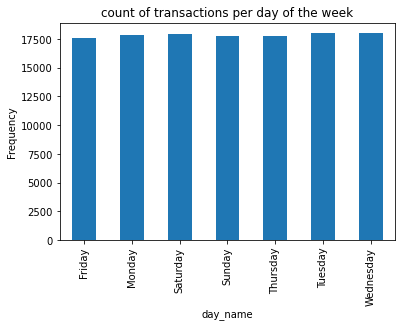

In [50]:
txn.groupby('day_name').tran_amount.count().plot.bar()
plt.ylabel('Frequency')
plt.title('count of transactions per day of the week')
plt.show()

1.6.3

In [52]:
agg_count = pd.NamedAgg(column = "tran_amount", aggfunc = "count")
clnt_daily_aggregations = txn.groupby(["customer_id", "day_name", "YEAR"]).agg(cnt = agg_count)
clnt_daily_aggregations.head()

cnt
customer_id day_name YEAR     
CS1112      Friday   2011    1
                     2013    1
            Monday   2013    1
            Saturday 2012    1
            Sunday   2011    1

In [58]:
clnt_daily_aggregations_pivot = clnt_daily_aggregations.pivot_table(columns = ['YEAR', 'day_name'], index = 'customer_id').fillna(0).astype("int")
clnt_daily_aggregations_pivot.head()

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  

[5 rows x 35 columns]

In [60]:
level_0 = clnt_daily_aggregations_pivot.columns.get_level_values (0).astype (str)

level_1 = clnt_daily_aggregations_pivot.columns.get_level_values (1).astype (str)

level_2 = clnt_daily_aggregations_pivot.columns.get_level_values (2).astype (str)
clnt_daily_aggregations_pivot.columns = level_0 + '_' + level_1 + '_' + level_2

In [61]:
clnt_daily_aggregations_pivot.head()

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


1.6.4

In [66]:
# confirm the output has the same number of rows as the final output in 1.2
print("The number of rows in 1.2 is:", len(clnt_annual_aggregations_pivot))
print("The number of rows in clnt_daily_aggregations_pivot is:", len(clnt_daily_aggregations_pivot))
print("The number of columns I created in this section is:", clnt_daily_aggregations_pivot.shape[1])

The number of rows in 1.2 is: 6889
The number of rows in clnt_daily_aggregations_pivot is: 6889
The number of columns I created in this section is: 35


In [65]:
clnt_daily_aggregations_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")

1.6.5

In [77]:
# group by customer_id, ME_DT, day_name
agg_count = pd.NamedAgg(column = "tran_amount", aggfunc = "count")
clnt_mth_day_aggregations = txn.groupby(["customer_id", "ME_DT", "day_name"]).agg(cnt = agg_count)
clnt_mth_day_aggregations.head()

cnt
customer_id ME_DT      day_name      
CS1112      2011-06-30 Wednesday    1
            2011-08-31 Friday       1
            2011-10-31 Sunday       1
            2012-04-30 Sunday       1
            2012-06-30 Sunday       1

In [78]:
clnt_mth_day_aggregations = clnt_mth_day_aggregations.pivot_table(columns = 'day_name', index = ['customer_id', 'ME_DT']).fillna(0).astype("int")
clnt_mth_day_aggregations.head()

cnt                                          \
day_name               Friday Monday Saturday Sunday Thursday Tuesday   
customer_id ME_DT                                                       
CS1112      2011-06-30      0      0        0      0        0       0   
            2011-08-31      1      0        0      0        0       0   
            2011-10-31      0      0        0      1        0       0   
            2012-04-30      0      0        0      1        0       0   
            2012-06-30      0      0        0      1        0       0   

                                  
day_name               Wednesday  
customer_id ME_DT                 
CS1112      2011-06-30         1  
            2011-08-31         0  
            2011-10-31         0  
            2012-04-30         0  
            2012-06-30         0

In [91]:
level_0 = clnt_mth_day_aggregations.columns.get_level_values (0).astype (str)
level_1 = clnt_mth_day_aggregations.columns.get_level_values (1).astype (str)
clnt_mth_day_aggregations.columns = level_0 + '_' + level_1 

In [97]:
clnt_mth_day_aggregations.head()

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0

1.6.6

In [99]:
# Join with base_table_pd
mth_day_counts = base_table_pd.join(clnt_mth_day_aggregations, on=['CLNT_NO','ME_DT'], how='left').fillna(0)
mth_day_counts.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CS5295,2015-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS5295,2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CS5295,2013-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# save to excel
mth_day_counts.to_excel("mth_day_counts.xlsx")

## 1.7

1.7.1

In [103]:
# groupby to create the table last monthly purchase that capture the last 'txn_date'
tures the last 'txn date' (aggfunc=max) for every client and month.
txn_date_max = pd.NamedAgg(column = "txn_date", aggfunc = "max")
last_monthly_purchase = txn.groupby(["customer_id", "ME_DT"]).agg(last_monthly_purchase = txn_date_max)
last_monthly_purchase.head()

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24

1.7.2

In [109]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on = ['CLNT_NO', 'ME_DT'], how = 'left')
last_monthly_purchase_base.sort_values(['CLNT_NO','ME_DT'], ascending = True, inplace = True)
last_monthly_purchase_base.loc[last_monthly_purchase_base['CLNT_NO'] == 'CS1112'].head()

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT


I plan to forward-fill the NaT values.

1.7.3

In [110]:
# use the method to forward-fill
last_monthly_purchase_base = last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill())
last_monthly_purchase_base.iloc[92:98]

,CLNT_NO,ME_DT,last_monthly_purchase
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


1.7.4

In [111]:
# calculate the column 'days since last txn'
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT'] - last_monthly_purchase_base['last_monthly_purchase']).dt.days

In [112]:
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


1.7.5

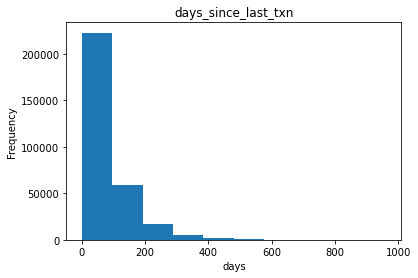

In [114]:
# Plot a histogram of the 'days since last txn'.
plt.hist(last_monthly_purchase_base['days_since_last_txn'])
plt.title('days_since_last_txn')
plt.ylabel('Frequency')
plt.xlabel('days')
plt.show()

In [118]:
# fill nan with -1 since by observations mode is 1 in histogram
last_monthly_purchase_base['days_since_last_txn'].fillna(-1, inplace = True)
# Save the columns ['CLNT_NO', 'ME_DT', 'days since last txn'] as days_since_last_txn.xlsx.
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel('days_since_last_txn.xlsx')